# Exploratory Data Analysis

This section contains an exploratory data analysis on the dataset. This will allow to to have a more clean view of the source data features dynamics over time and to spot possible patterns in data, if any.

Data are provided in a straight order pandas dataframe (first record first).

#### ***IBM*** data:

Let's have a look, from oldest to newest:

In [14]:
df_yf_ibm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,7.713333,7.713333,7.626667,7.626667,1.858243,390000
1962-01-03,7.626667,7.693333,7.626667,7.693333,1.874485,292500
1962-01-04,7.693333,7.693333,7.613333,7.616667,1.855805,262500
1962-01-05,7.606667,7.606667,7.453333,7.466667,1.819257,367500
1962-01-08,7.460000,7.460000,7.266667,7.326667,1.785148,547500


#### ***Apple Inc.*** data:

Oldest data available:

In [15]:
df_yf_aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100922,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095657,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088636,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090830,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093463,73449600


#### ***Amazon.com Inc.*** data:

Oldest data available:

In [16]:
df_yf_amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


#### ***Alphabet Inc.*** data:

Oldest data available:

In [17]:
df_yf_googl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


Hence, the least common date available will be the following value:

In [18]:
data_start = df_yf_googl.index[0]

In [19]:
print(data_start)

2004-08-19 00:00:00


## Data visualization

Some data visualization will help to spot data dynamics.

In [20]:
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

Stock volume history of IBM stock:

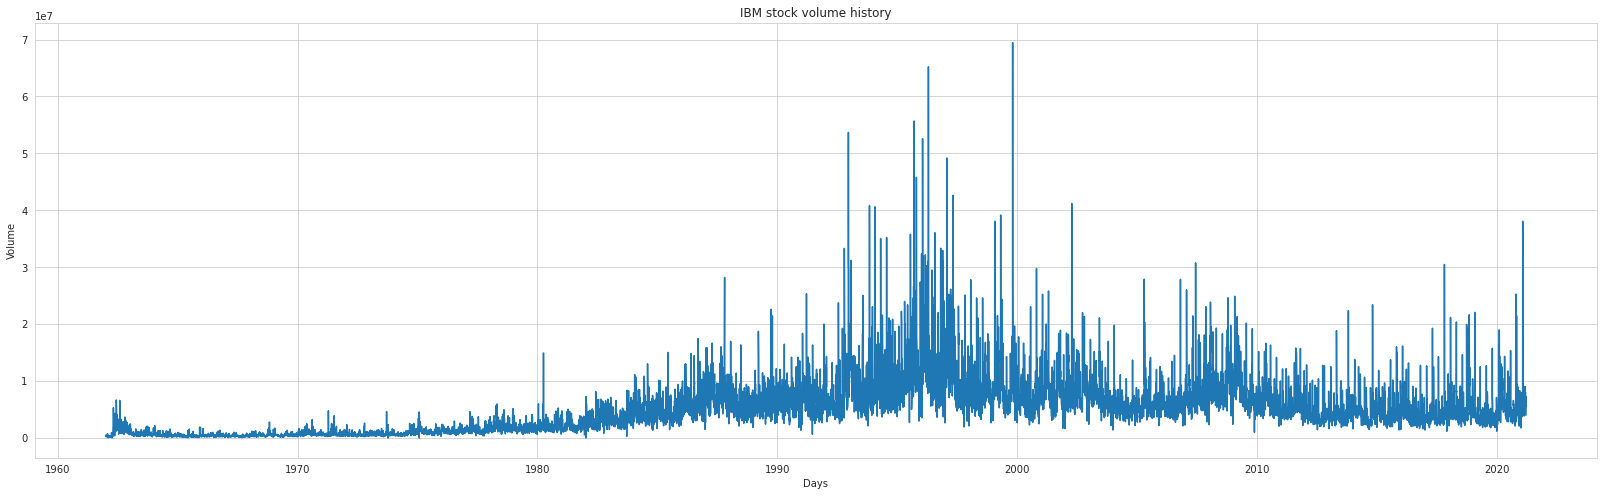

In [21]:
plt.figure(figsize=(28, 8))
plt.plot(df_ibm["Volume"])
plt.title('IBM stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [22]:
print("checking if any null values are present\n", df_ibm.isna().sum())

checking if any null values are present
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [23]:
print("checking if any null values are present\n", df_aapl.isna().sum())

checking if any null values are present
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [24]:
print("checking if any null values are present\n", df_amzn.isna().sum())

checking if any null values are present
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [25]:
print("checking if any null values are present\n", df_googl.isna().sum())

checking if any null values are present
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


#### ***IBM*** data:

<AxesSubplot:xlabel='Date'>

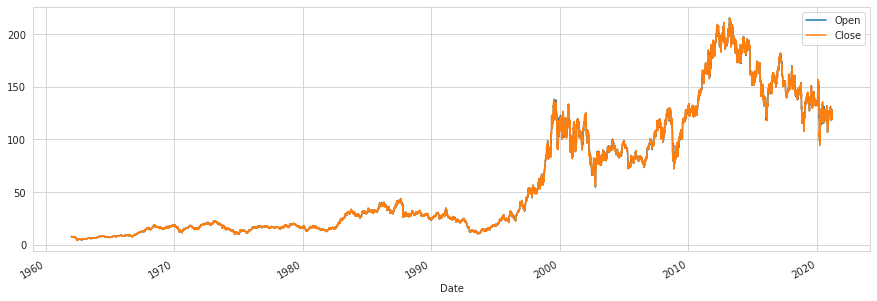

In [26]:
df_ibm[['Open', 'Close']].plot(legend=True,figsize=(15,5))

<AxesSubplot:xlabel='Date'>

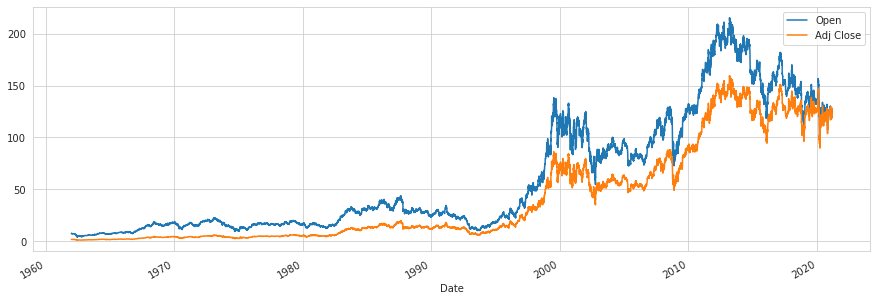

In [27]:
df_ibm[['Open', 'Adj Close']].plot(legend=True,figsize=(15,5))

Checking for inter-features correlation:

In [28]:
# Compute the correlation matrix
df_ibm_corr = df_ibm.corr()

In [29]:
import numpy as np

In [30]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_ibm_corr, dtype=bool))

<AxesSubplot:>

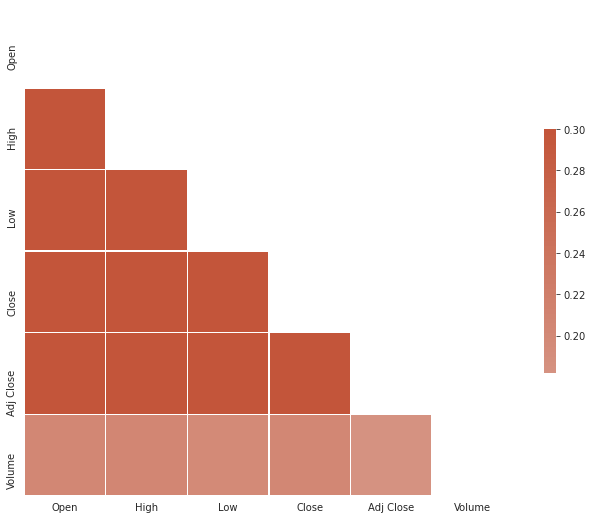

In [31]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_ibm_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Nominally, the Volume feature has a lower correlation with the other feature but, indeed, we can presume it contains very useful data, from the moment that we know that Open, High, Low and Close value are all mostly linearly correlated to Adj Close value (our target feature).

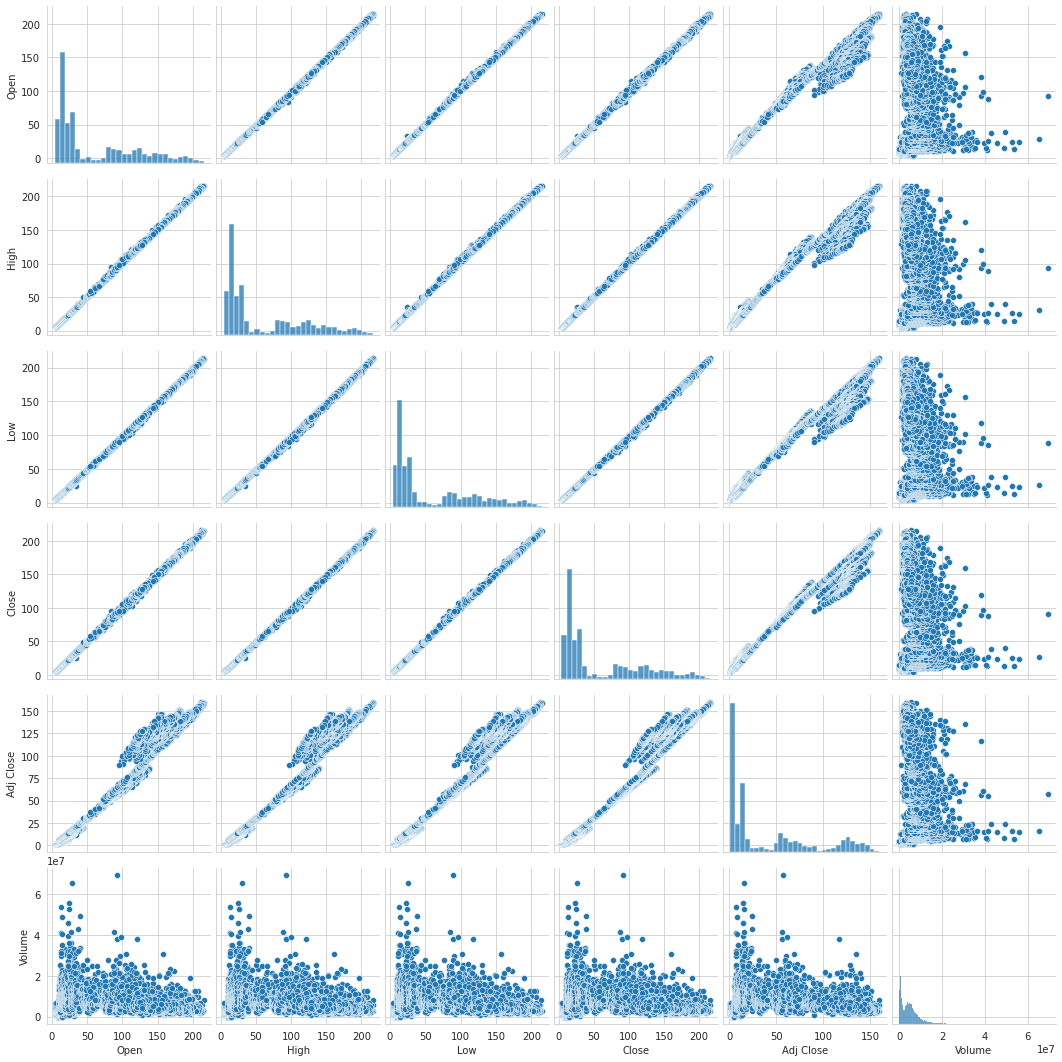

In [32]:
sns.pairplot(df_ibm)

From what we can see in the pairplot, we can expect the volume to be pretty high when the value of the stock is low and to get lower when the value of the stock is high.
We can run an additional visual check on this hypotesis:

<AxesSubplot:xlabel='Adj Close', ylabel='Volume'>

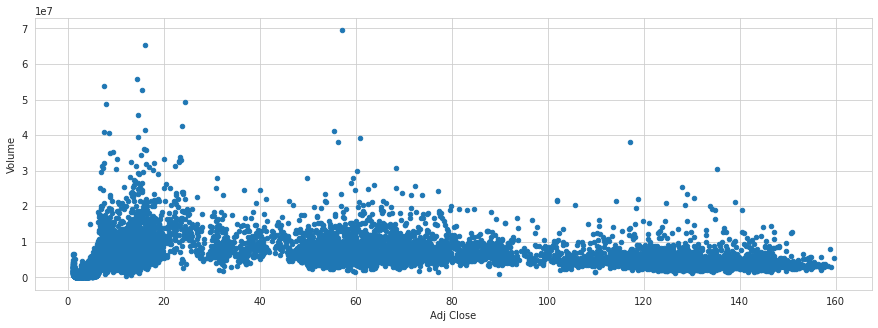

In [33]:
df_ibm.plot.scatter('Adj Close', 'Volume', legend=True, figsize=(15, 5))

<AxesSubplot:xlabel='Close', ylabel='Volume'>

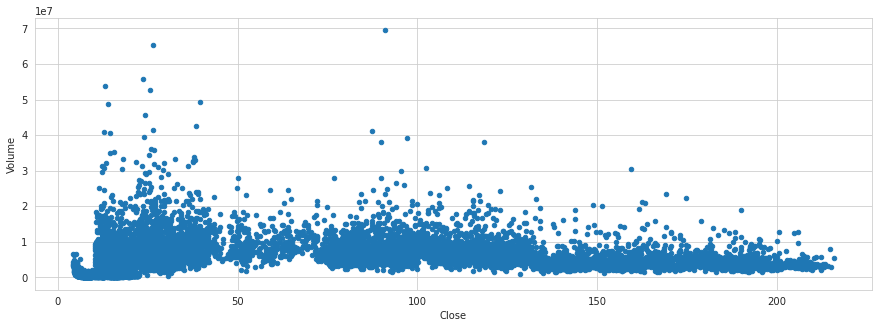

In [34]:
df_ibm.plot.scatter('Close', 'Volume', legend=True, figsize=(15, 5))

<AxesSubplot:xlabel='High', ylabel='Volume'>

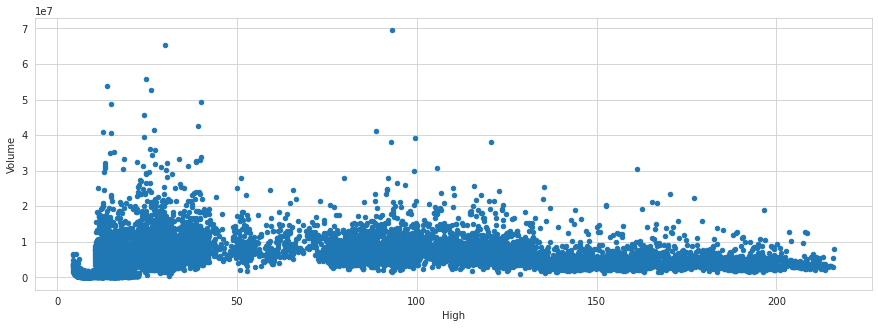

In [35]:
df_ibm.plot.scatter('High', 'Volume', legend=True, figsize=(15, 5))

More generally, it seems like specific values of the stock is realated to specific volume amount... Let's check another couple of stocks to see if this is a general beahvior in this kind of stock:

<AxesSubplot:xlabel='Adj Close', ylabel='Volume'>

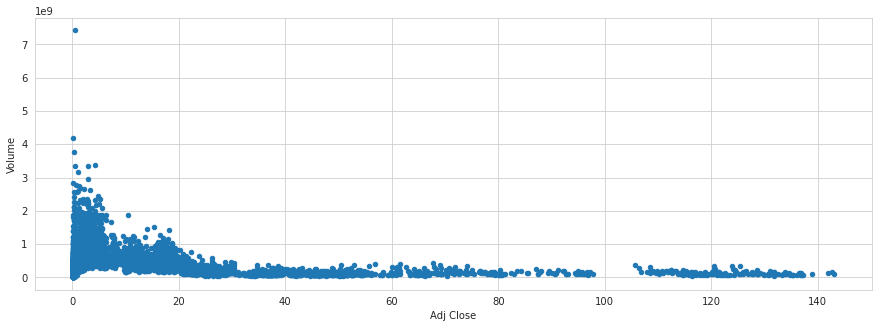

In [36]:
df_aapl.plot.scatter('Adj Close', 'Volume', legend=True, figsize=(15, 5))

**Apple Inc.** stock volume is even more related to Adjusted Close value. 

<AxesSubplot:xlabel='Adj Close', ylabel='Volume'>

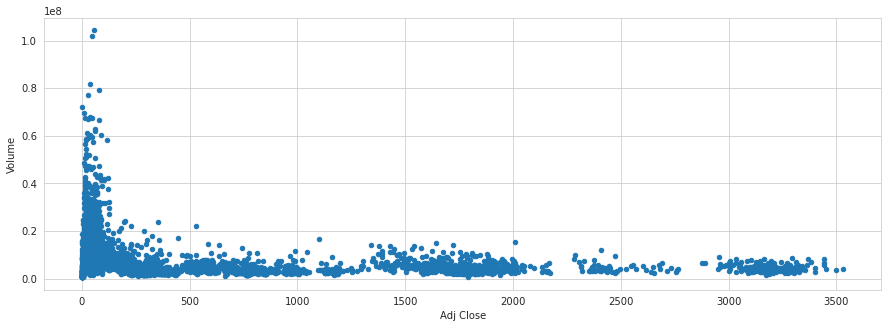

In [37]:
df_amzn.plot.scatter('Adj Close', 'Volume', legend=True, figsize=(15, 5))

**Amazon.com** stock too shows this behavior...

<AxesSubplot:xlabel='Adj Close', ylabel='Volume'>

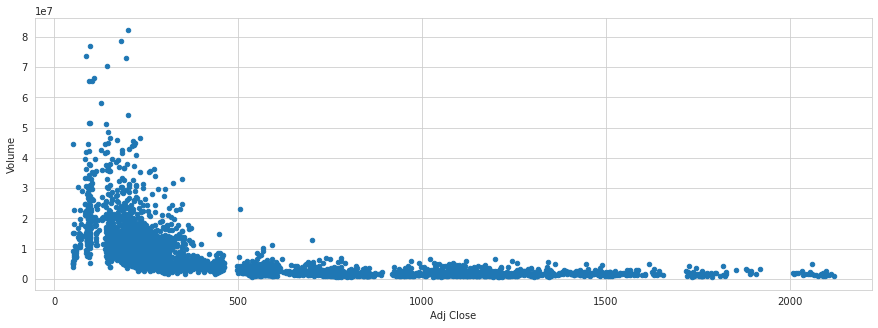

In [38]:
df_googl.plot.scatter('Adj Close', 'Volume', legend=True, figsize=(15, 5))

**Alphabet** stocks behavior confirms that.

#### ***Apple Inc.*** data:

<AxesSubplot:xlabel='Date'>

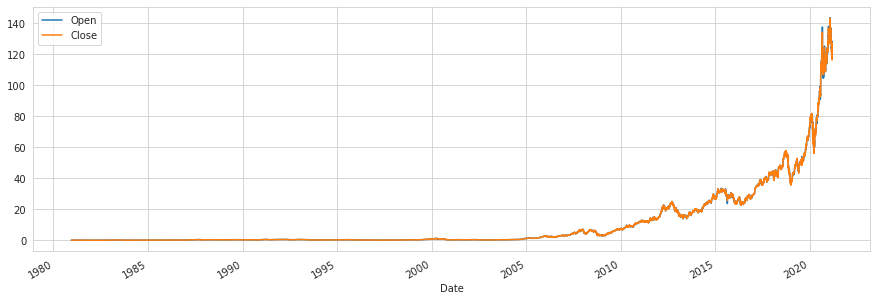

In [39]:
df_aapl[['Open', 'Close']].plot(legend=True,figsize=(15,5))

<AxesSubplot:xlabel='Date'>

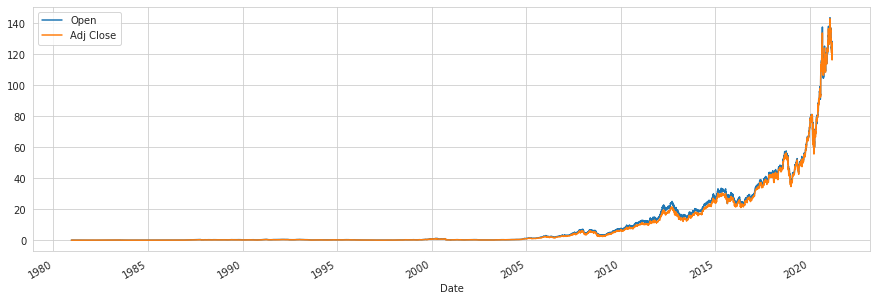

In [40]:
df_aapl[['Open', 'Adj Close']].plot(legend=True,figsize=(15,5))

Checking for inter-features correlation:

In [41]:
# Compute the correlation matrix
df_aapl_corr = df_aapl.corr()

In [42]:
import numpy as np

In [43]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_aapl_corr, dtype=bool))

<AxesSubplot:>

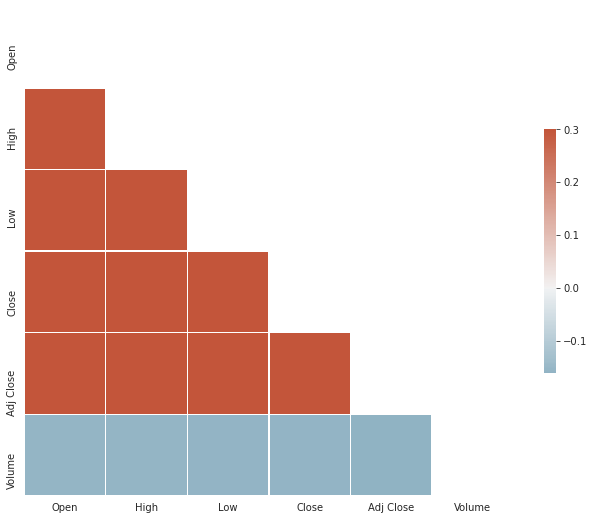

In [44]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_aapl_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

"Volume" feature has a lower correlation with the other features here we can clearly spot the expected correlation as hypotized about IBM stock.

### Seasonal pattern hypotesis on IBM stock

In [45]:
import pandas as pd

My hypotesis is that IBM can have an annual pattern, from september to october.
Let's run a more precise visual check:

One year period:

In [46]:
start_date = data_start
end_date = data_start+pd.offsets.DateOffset(years=1)

<AxesSubplot:xlabel='Date'>

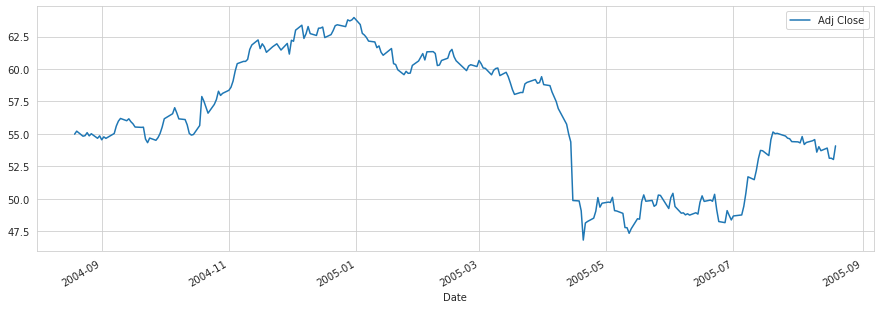

In [47]:
df_ibm[start_date:end_date][['Adj Close']].plot(legend=True,figsize=(15,5))

2000-2001 period:

In [48]:
start_date = end_date
end_date = end_date+pd.offsets.DateOffset(years=1)

<AxesSubplot:xlabel='Date'>

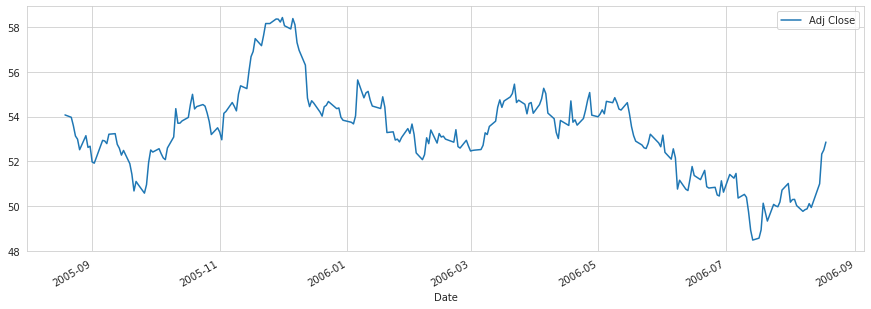

In [49]:
df_ibm[start_date:end_date][['Adj Close']].plot(legend=True,figsize=(15,5))

This seems to confirm my theory.

2001-2002 period:

In [50]:
start_date = end_date
end_date = end_date+pd.offsets.DateOffset(years=1)

<AxesSubplot:xlabel='Date'>

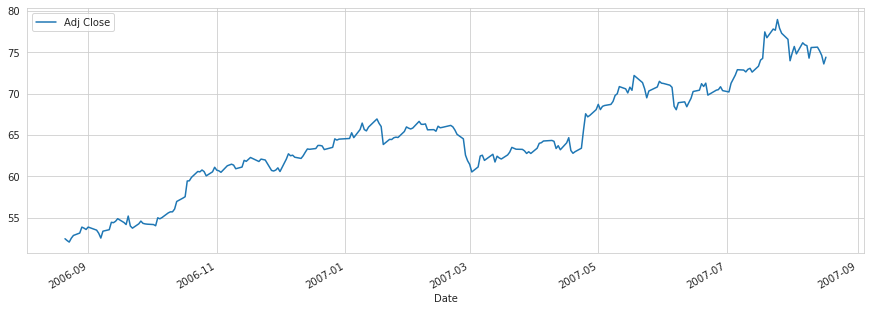

In [51]:
df_ibm[start_date:end_date][['Adj Close']].plot(legend=True,figsize=(15,5))

Looking to this one, I'm not sure that this applies to all periods. So, I will just analyze the last three years

In [52]:
end_date = pd.to_datetime('today').normalize()
start_date = end_date-pd.offsets.DateOffset(years=3)

<AxesSubplot:xlabel='Date'>

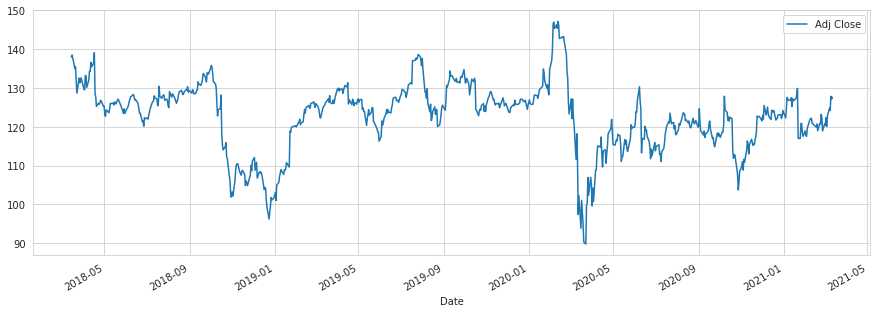

In [53]:
df_ibm[start_date:end_date][['Adj Close']].plot(legend=True,figsize=(15,5))

Looking at these data, it seems quite present, but is not so evident anymore.

### Conclusions about seasonality patterns

No clear seasonal pattern could be presumed in all the data.
All stocks as some kind of vague annual seasonality. Further investigation could be conducted later, but for now, we will not use any of this values to define context legnth and prediction length.

### Simple Moving Average (SMA)

Moving average is a techical indicator that smooths real data oscillations over time.
It can aid in determining if an asset price will continue or if it will reverse a bull or bear trend.

In this notebook, I'll use Simple Moving Average indicator as a benchmark model.

SMA will be used in the project for three purposes:
* Detect if some seasonal pattern is present in data
* A benchmark for deep learning model performance
* An additional feature to be used to train deep learning model

Before moving to feature engineering, reference date index to be used to build the model will be defined:

In [54]:
analysis_start_date = data_start

Anyway, new feature will be computed on the whole dataframe. Plotting will be limited to `analysis_start_date`

In [55]:
from ta_utils.technical_indicators import moving_average, volatility

#### IBM stock moving averages

In [56]:
# moving average sizes in days
ma_d_sz = [10,20,50]

# adding moving average columns to dataframe
for mds in ma_d_sz:
    column_name = "%s_ac_ma" %(str(mds))
    df_ibm[column_name] = moving_average(df_ibm['Adj Close'], window_size=mds)

Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [57]:
df_ibm.fillna(method='backfill', inplace=True)

Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [58]:
df_ibm.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma
Date,,,,,,,,,
1962-01-02,7.713333,7.713333,7.626667,7.626667,1.858243,390000,1.831034,1.806507,1.787152
1962-01-03,7.626667,7.693333,7.626667,7.693333,1.874485,292500,1.831034,1.806507,1.787152
1962-01-04,7.693333,7.693333,7.613333,7.616667,1.855805,262500,1.831034,1.806507,1.787152
1962-01-05,7.606667,7.606667,7.453333,7.466667,1.819257,367500,1.831034,1.806507,1.787152
1962-01-08,7.460000,7.460000,7.266667,7.326667,1.785148,547500,1.831034,1.806507,1.787152


<AxesSubplot:xlabel='Date'>

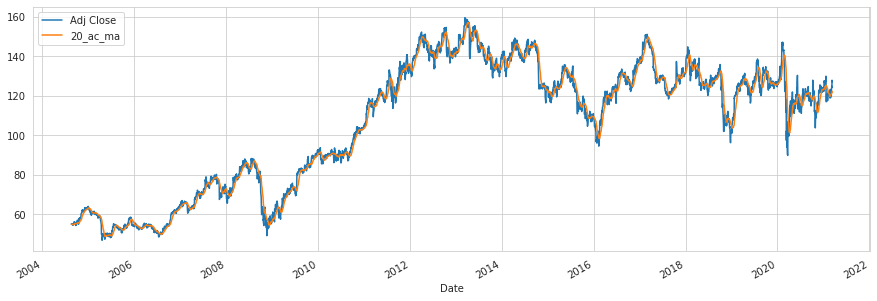

In [59]:
df_ibm[analysis_start_date:][['Adj Close', '20_ac_ma']].plot(legend=True,figsize=(15,5))

#### Apple stock moving averages

In [60]:
# moving average sizes in days
ma_d_sz = [10,20,50]

# adding moving average columns to dataframe
for mds in ma_d_sz:
    column_name = "%s_ac_ma" %(str(mds))    
    df_aapl[column_name] = moving_average(df_aapl['Adj Close'], window_size=mds)

In [61]:
df_aapl.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100922,469033600,NaN,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095657,175884800,NaN,NaN,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088636,105728000,NaN,NaN,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090830,86441600,NaN,NaN,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093463,73449600,NaN,NaN,NaN


Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [62]:
df_aapl.fillna(method='backfill', inplace=True)

In [63]:
df_aapl.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100922,469033600,0.101975,0.108974,0.104248
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095657,175884800,0.101975,0.108974,0.104248
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088636,105728000,0.101975,0.108974,0.104248
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090830,86441600,0.101975,0.108974,0.104248
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093463,73449600,0.101975,0.108974,0.104248


<AxesSubplot:xlabel='Date'>

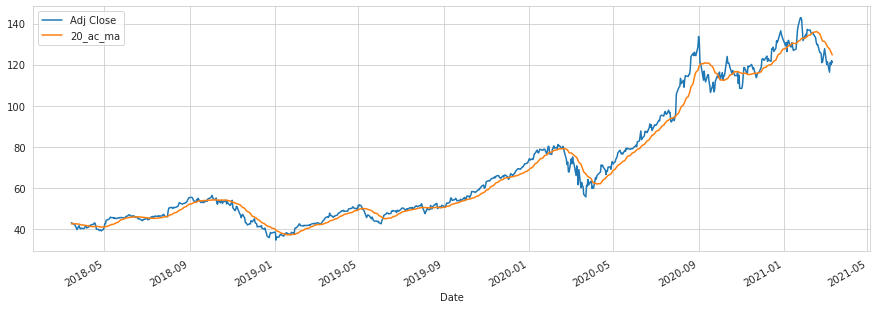

In [64]:
df_aapl[start_date:end_date][['Adj Close', '20_ac_ma']].plot(legend=True,figsize=(15,5))

#### Amazon.com stock moving averages

In [65]:
# moving average sizes in days
ma_d_sz = [10,20,50]

# adding moving average columns to dataframe
for mds in ma_d_sz:
    column_name = "%s_ac_ma" %(str(mds))    
    df_amzn[column_name] = moving_average(df_amzn['Adj Close'], window_size=mds)

In [66]:
df_amzn.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma
Date,,,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,NaN,NaN,NaN
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,NaN,NaN,NaN
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,NaN,NaN,NaN
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,NaN,NaN,NaN
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,NaN,NaN,NaN


Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [67]:
df_amzn.fillna(method='backfill', inplace=True)

In [68]:
df_amzn.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma
Date,,,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,1.597396,1.57474,1.772813
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,1.597396,1.57474,1.772813
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,1.597396,1.57474,1.772813
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,1.597396,1.57474,1.772813
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,1.597396,1.57474,1.772813


<AxesSubplot:xlabel='Date'>

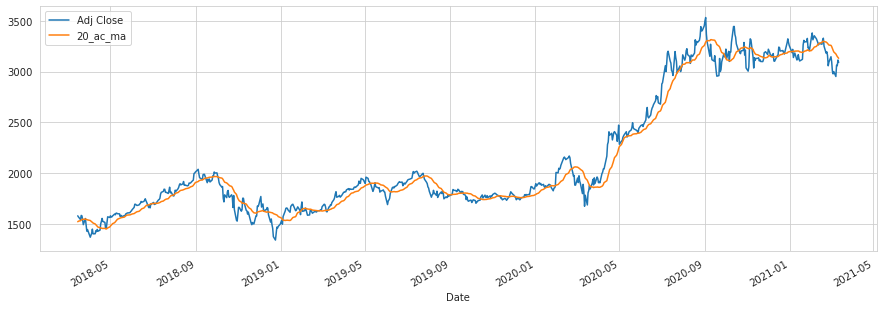

In [69]:
df_amzn[start_date:end_date][['Adj Close', '20_ac_ma']].plot(legend=True,figsize=(15,5))

#### Alphabet Inc. stock moving averages

In [70]:
# moving average sizes in days
ma_d_sz = [10,20,50]

# adding moving average columns to dataframe
for mds in ma_d_sz:
    column_name = "%s_ac_ma" %(str(mds))    
    df_googl[column_name] = moving_average(df_googl['Adj Close'], window_size=mds)

In [71]:
df_googl.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,NaN,NaN,NaN
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,NaN,NaN,NaN
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,NaN,NaN,NaN
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,NaN,NaN,NaN
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,NaN,NaN,NaN


Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [72]:
df_googl.fillna(method='backfill', inplace=True)

In [73]:
df_googl.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,52.432933,52.692943,63.586987
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,52.432933,52.692943,63.586987
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,52.432933,52.692943,63.586987
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,52.432933,52.692943,63.586987
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,52.432933,52.692943,63.586987


<AxesSubplot:xlabel='Date'>

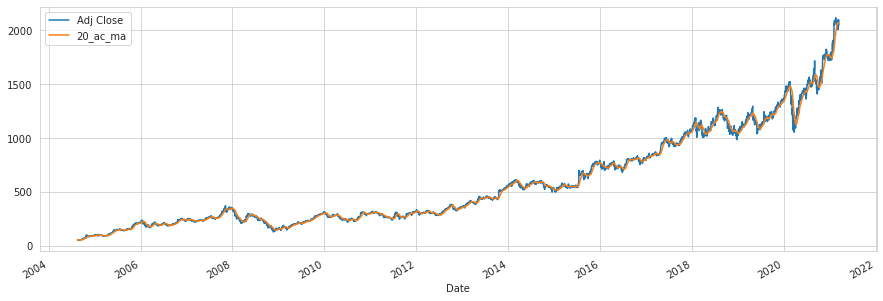

In [74]:
df_googl[analysis_start_date:end][['Adj Close', '20_ac_ma']].plot(legend=True,figsize=(15,5))

### Bollinger bands

Another interesting feature that can be computed from Adjusted Close are Bollinger bands.
I'll use that for two purposes:
* visualization,
* feature engineering

In [75]:
from ta_utils.technical_indicators import bollinger_bands

#### IBM bollinger bands:

In [76]:
# bollinger bands window sizes in days
ma_d_sz = [10,20,50]

# adding moving average columns to dataframe
for mds in ma_d_sz:
    ub_column_name = "%s_ac_bb_u" %(str(mds))
    lb_column_name = "%s_ac_bb_l" %(str(mds))
    df_ibm[ub_column_name] = bollinger_bands(df_ibm['Adj Close'], window_size=mds)[1]
    df_ibm[lb_column_name] = bollinger_bands(df_ibm['Adj Close'], window_size=mds)[2]

In [77]:
df_ibm.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
1962-01-02,7.713333,7.713333,7.626667,7.626667,1.858243,390000,1.831034,1.806507,1.787152,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,7.626667,7.693333,7.626667,7.693333,1.874485,292500,1.831034,1.806507,1.787152,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,7.693333,7.693333,7.613333,7.616667,1.855805,262500,1.831034,1.806507,1.787152,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,7.606667,7.606667,7.453333,7.466667,1.819257,367500,1.831034,1.806507,1.787152,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,7.460000,7.460000,7.266667,7.326667,1.785148,547500,1.831034,1.806507,1.787152,NaN,NaN,NaN,NaN,NaN,NaN


Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [78]:
df_ibm.fillna(method='backfill', inplace=True)

In [79]:
df_ibm.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
1962-01-02,7.713333,7.713333,7.626667,7.626667,1.858243,390000,1.831034,1.806507,1.787152,1.885422,1.776646,1.878527,1.734487,1.854736,1.719568
1962-01-03,7.626667,7.693333,7.626667,7.693333,1.874485,292500,1.831034,1.806507,1.787152,1.885422,1.776646,1.878527,1.734487,1.854736,1.719568
1962-01-04,7.693333,7.693333,7.613333,7.616667,1.855805,262500,1.831034,1.806507,1.787152,1.885422,1.776646,1.878527,1.734487,1.854736,1.719568
1962-01-05,7.606667,7.606667,7.453333,7.466667,1.819257,367500,1.831034,1.806507,1.787152,1.885422,1.776646,1.878527,1.734487,1.854736,1.719568
1962-01-08,7.460000,7.460000,7.266667,7.326667,1.785148,547500,1.831034,1.806507,1.787152,1.885422,1.776646,1.878527,1.734487,1.854736,1.719568


In [80]:
end_date = pd.to_datetime('today').normalize()
start_date = end_date-pd.offsets.DateOffset(years=1)


<AxesSubplot:xlabel='Date'>

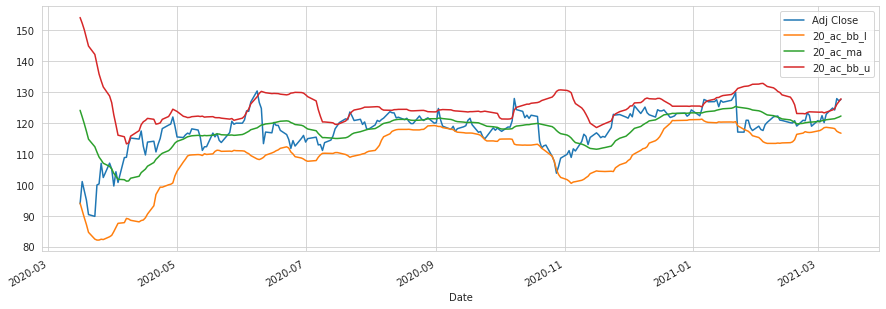

In [81]:
df_ibm[start_date:end_date][['Adj Close', '20_ac_bb_l', '20_ac_ma','20_ac_bb_u']].plot(legend=True,figsize=(15,5))

#### Apple bollinger bands:

In [82]:
# bollinger bands window sizes in days
ma_d_sz = [10,20,50]

# adding moving average columns to dataframe
for mds in ma_d_sz:
    ub_column_name = "%s_ac_bb_u" %(str(mds))
    lb_column_name = "%s_ac_bb_l" %(str(mds))
    df_aapl[ub_column_name] = bollinger_bands(df_aapl['Adj Close'], window_size=mds)[1]
    df_aapl[lb_column_name] = bollinger_bands(df_aapl['Adj Close'], window_size=mds)[2]

In [83]:
df_aapl.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100922,469033600,0.101975,0.108974,0.104248,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095657,175884800,0.101975,0.108974,0.104248,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088636,105728000,0.101975,0.108974,0.104248,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090830,86441600,0.101975,0.108974,0.104248,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093463,73449600,0.101975,0.108974,0.104248,NaN,NaN,NaN,NaN,NaN,NaN


Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [84]:
df_aapl.fillna(method='backfill', inplace=True)

In [85]:
df_aapl.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100922,469033600,0.101975,0.108974,0.104248,0.124365,0.079585,0.132002,0.085946,0.126685,0.081811
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095657,175884800,0.101975,0.108974,0.104248,0.124365,0.079585,0.132002,0.085946,0.126685,0.081811
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088636,105728000,0.101975,0.108974,0.104248,0.124365,0.079585,0.132002,0.085946,0.126685,0.081811
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090830,86441600,0.101975,0.108974,0.104248,0.124365,0.079585,0.132002,0.085946,0.126685,0.081811
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093463,73449600,0.101975,0.108974,0.104248,0.124365,0.079585,0.132002,0.085946,0.126685,0.081811


<AxesSubplot:xlabel='Date'>

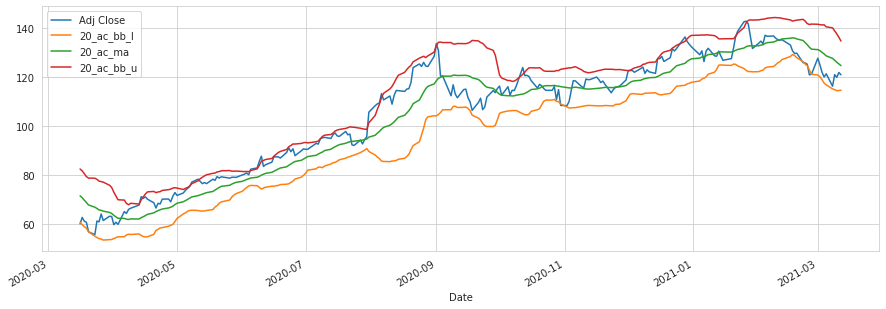

In [86]:
df_aapl[start_date:end_date][['Adj Close', '20_ac_bb_l', '20_ac_ma','20_ac_bb_u']].plot(legend=True,figsize=(15,5))

#### AMZN bollinger bands:

In [87]:
# bollinger bands window sizes in days
ma_d_sz = [10,20,50]

# adding moving average columns to dataframe
for mds in ma_d_sz:
    ub_column_name = "%s_ac_bb_u" %(str(mds))
    lb_column_name = "%s_ac_bb_l" %(str(mds))
    df_amzn[ub_column_name] = bollinger_bands(df_amzn['Adj Close'], window_size=mds)[1]
    df_amzn[lb_column_name] = bollinger_bands(df_amzn['Adj Close'], window_size=mds)[2]

In [88]:
df_amzn.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,1.597396,1.57474,1.772813,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,1.597396,1.57474,1.772813,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,1.597396,1.57474,1.772813,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,1.597396,1.57474,1.772813,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,1.597396,1.57474,1.772813,NaN,NaN,NaN,NaN,NaN,NaN


Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [89]:
df_amzn.fillna(method='backfill', inplace=True)

In [90]:
df_amzn.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,1.597396,1.57474,1.772813,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,1.597396,1.57474,1.772813,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,1.597396,1.57474,1.772813,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,1.597396,1.57474,1.772813,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,1.597396,1.57474,1.772813,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822


<AxesSubplot:xlabel='Date'>

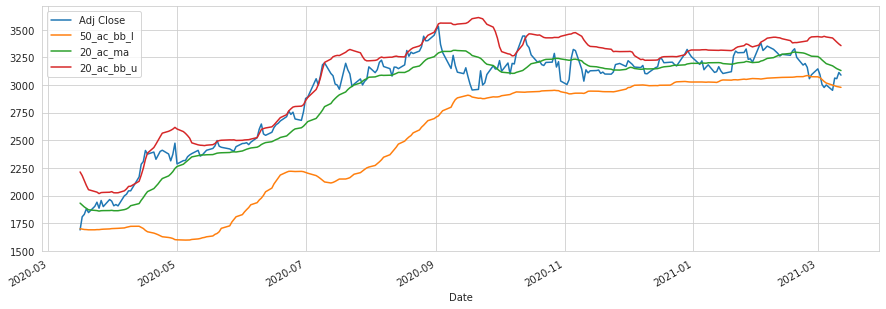

In [91]:
df_amzn[start_date:end_date][['Adj Close', '50_ac_bb_l', '20_ac_ma','20_ac_bb_u']].plot(legend=True,figsize=(15,5))

Alphabet Inc. bollinger bands:

In [92]:
# bollinger bands window sizes in days
ma_d_sz = [10,20,50]

# adding moving average columns to dataframe
for mds in ma_d_sz:
    ub_column_name = "%s_ac_bb_u" %(str(mds))
    lb_column_name = "%s_ac_bb_l" %(str(mds))
    df_googl[ub_column_name] = bollinger_bands(df_googl['Adj Close'], window_size=mds)[1]
    df_googl[lb_column_name] = bollinger_bands(df_googl['Adj Close'], window_size=mds)[2]

In [93]:
df_googl.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,52.432933,52.692943,63.586987,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,52.432933,52.692943,63.586987,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,52.432933,52.692943,63.586987,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,52.432933,52.692943,63.586987,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,52.432933,52.692943,63.586987,NaN,NaN,NaN,NaN,NaN,NaN


Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [94]:
df_googl.fillna(method='backfill', inplace=True)

In [95]:
df_googl.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,52.432933,52.692943,63.586987,55.781053,49.084813,56.933168,48.452718,88.331593,38.842381
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,52.432933,52.692943,63.586987,55.781053,49.084813,56.933168,48.452718,88.331593,38.842381
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,52.432933,52.692943,63.586987,55.781053,49.084813,56.933168,48.452718,88.331593,38.842381
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,52.432933,52.692943,63.586987,55.781053,49.084813,56.933168,48.452718,88.331593,38.842381
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,52.432933,52.692943,63.586987,55.781053,49.084813,56.933168,48.452718,88.331593,38.842381


<AxesSubplot:xlabel='Date'>

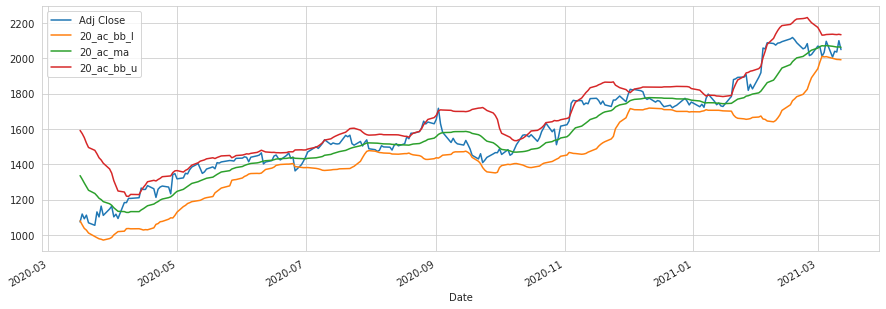

In [96]:
df_googl[start_date:end_date][['Adj Close', '20_ac_bb_l', '20_ac_ma','20_ac_bb_u']].plot(legend=True,figsize=(15,5))